# Sommaire

* [Imports](#chapter1)
* [Decision Tree](#chapter2)
* [Naive Bayes](#chapter3)
* [SVM](#chapter4)
* [Random Forest](#chapter5)

### Imports <a class="anchor" id="chapter1"></a>

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import collections

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

### Decision Tree <a class="anchor" id="chapter2"></a>

In [27]:
tfidf = pd.read_csv('/Users/emanieluu/Documents/pythonProject/ProjetPython2A/tfidf_Drake_Kanye West.csv') 

In [28]:
tfidf.head()

,Unnamed: 0,level_0,aaaaahhh,aaawwwww,aaliyah,aaron,abandon,abbey,abby,abc,...,zonin,zooted,zulu,zöld,ándale,ölén,úgy,еdition,еmpty,Target
0,0,6859296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048607,0.0,1
1,1,7165569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
2,2,7165581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
3,3,7165576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
4,4,5367025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1


In [29]:
tfidf = tfidf.drop(["Unnamed: 0"],axis = 1)

0/200
10/200
20/200
30/200
40/200
50/200
60/200
70/200
80/200
90/200
100/200
110/200
120/200
130/200
140/200
150/200
160/200
170/200
180/200
190/200


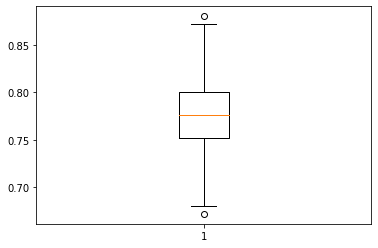

0.77656


In [52]:
list_accuracy = []
for j in range(200):
    
    if j%10 ==0 :
        print(f'{j}/200')
        
    tfidf = tfidf.sample(frac=1)
    
    rows, columns = tfidf.shape
    b = columns - 1
    X_train = tfidf.iloc[:, :-1][:int(rows // (10 / 8))] 
    X_test = tfidf.iloc[:, :-1][int(rows // (10 / 8)):] 
    y_train = tfidf.iloc[:, b:][:int(rows // (10 / 8))] 
    y_test = tfidf.iloc[:, b:][int(rows // (10 / 8)):]
    
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()
    
    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    compteur = 0
    y_test_ = [y for y in y_test['Target']]
    for i in range(len(y_pred)):
        if y_pred[i] == y_test_[i]:
            # print('Bonne prédiction')
            compteur += 1
    list_accuracy.append(compteur / len(y_pred))

#plt.scatter(pd.DataFrame.from_dict(dict(collections.Counter(list_accuracy) ),orient='index').reset_index()['index'],
#

pd.DataFrame.from_dict(dict(collections.Counter(list_accuracy)),orient='index').reset_index()[0]
plt.boxplot(list_accuracy)
plt.show()

print(np.mean(list_accuracy))

### Naive Bayes <a class="anchor" id="chapter3"></a>

In [208]:
X = []
Y = []

test_artist = ['Drake','Adele']

#for filename in os.listdir('/Users/emanieluu/Documents/pythonProject/ProjetPython2A/completed_data'):
for artist in test_artist:
    data = pd.read_csv(open('/Users/emanieluu/Documents/pythonProject/ProjetPython2A/completed_data/final_discography_{}.csv'.format(artist)),encoding='utf-8', engine='c')
    # ignore macOS files        
    #artist_name = filename.replace('.csv', '')[18:]
    data["Clean Lyrics"] = data["Clean Lyrics"].values.astype('U')
    X += data["Clean Lyrics"].values.tolist()
    for i in range(len(data)):
        #one_h = np.zeros(nb_artists) 
        #artist_index = artist_names.index(artist_name)
        #one_h[artist_index] = 1
        #add the one hot encoding to the Y array
        Y.append(artist)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42)

In [210]:
pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

In [211]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

In [212]:
pipeline.score(X_test,y_test).round(2)

0.73

In [57]:
texte = ['You used to call me on my You used to, you used to Yeah You used to call me on my cell phoneLate night when you need my love Call me on my cell phoneLate night when you need my loveAnd I know when that hotline blingThat can only mean one thingI know when that hotline blingThat can only mean one thing']

In [58]:
y_test[8]

'Adele'

In [59]:
result = pipeline.predict_proba(texte)
print(result)

[[0. 0. 1.]]


In [60]:
print(f"The artist is: {pipeline.classes_[result.argmax()]}")

The artist is: Kanye West


In [61]:
pipeline.classes_

array(['Adele', 'Drake', 'Kanye West'], dtype='<U10')

In [24]:
pipeline.feature_classes_

AttributeError: 'Pipeline' object has no attribute 'feature_classes_'

### SVM <a class="anchor" id="chapter4"></a>

### Random Forest <a class="anchor" id="chapter5"></a>